In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the First Dataset From the Drive (application_record.csv)

In [41]:
#read data
df = pd.read_csv('/content/drive/MyDrive/application_record.csv')

# Reading the Second Dataset From the Drive (credit_record.csv)

In [42]:
df_target = pd.read_csv('/content/drive/MyDrive/credit_record.csv')

# Sanity Check for the Data

In [43]:
#Shape of the data
df.shape

(438557, 18)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [45]:
#Number of missing values
df.isnull().sum()
#Result: OCCUPATION_TYPE is the only column with missing values

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [46]:
#Percentage of missing values in a column
(df.isnull().sum()/df.shape[0])*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


In [47]:
#Number of unique records in a column
unique_counts = df.nunique()
print(unique_counts)

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


In [48]:
# Showing ID's that are duplicated
id_counts = df['ID'].value_counts()

# Filter for IDs that appear more than once
duplicate_ids_summary = id_counts[id_counts > 1]

print(duplicate_ids_summary)
#Found that all duplicated IDs don't exist at the second dataset with the target

ID
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
7602432    2
7036518    2
7045885    2
7618285    2
7089090    2
7052783    2
7416167    2
7023108    2
7045794    2
7053557    2
7207977    2
7836711    2
7772847    2
7154819    2
7052812    2
7099881    2
7022327    2
7833087    2
7743418    2
7836971    2
7372589    2
7636756    2
7636389    2
7213374    2
7317997    2
7838075    2
7023651    2
7155150    2
7091721    2
7046068    2
7742298    2
7744386    2
7702516    2
7022197    2
7154598    2
7742853    2
7090931    2
7135270    2
7024111    2
7174719    2
7603224    2
7576316    2
Name: count, dtype: int64


In [49]:
#identifying garbage values
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)

#Result: No garbage values

CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
****************************************
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
****************************************
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
****************************************
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow            

## Exploratory Data Analysis (EDA)

In [50]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [51]:
df.describe(include = "object")

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


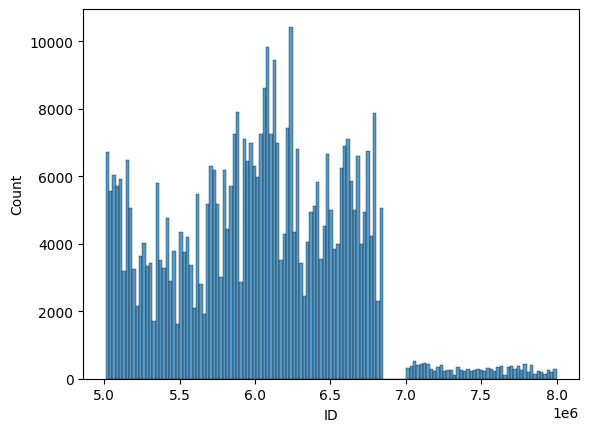

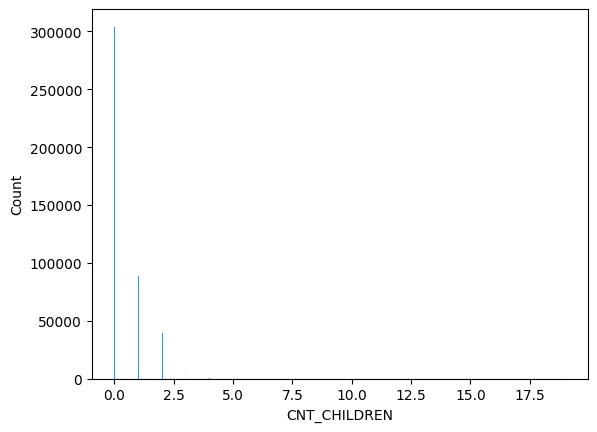

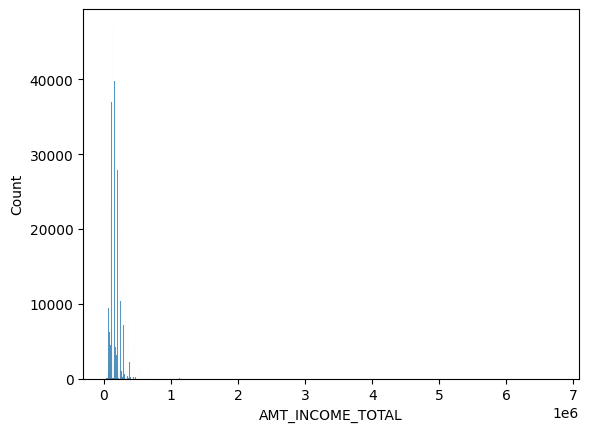

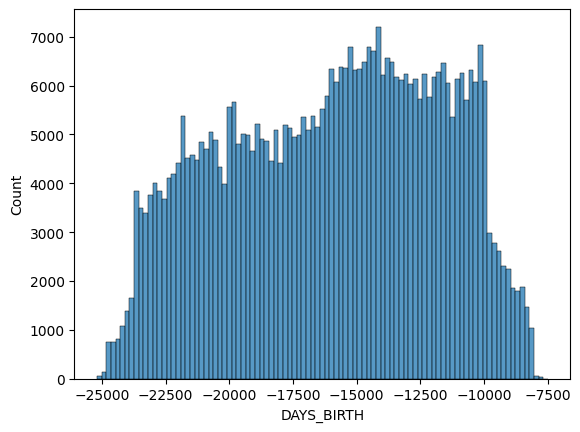

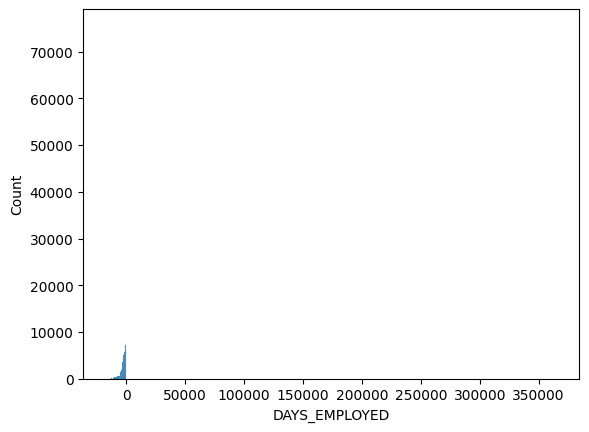

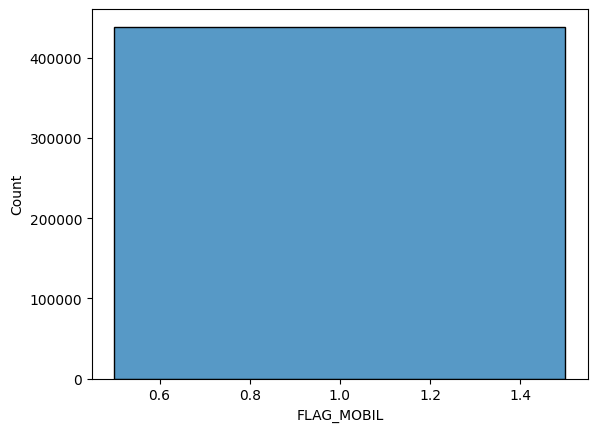

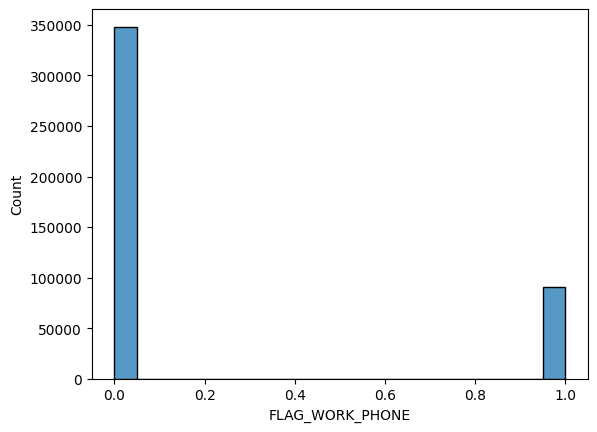

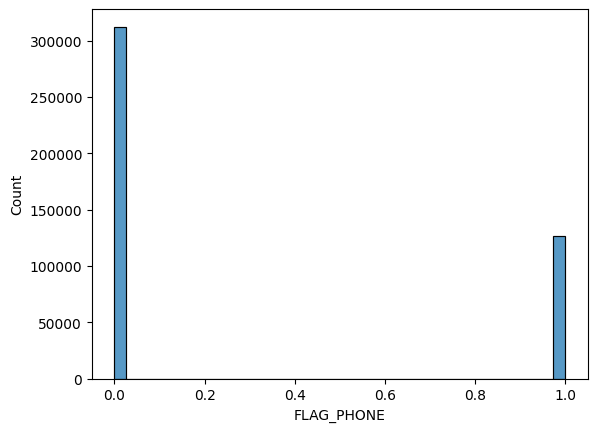

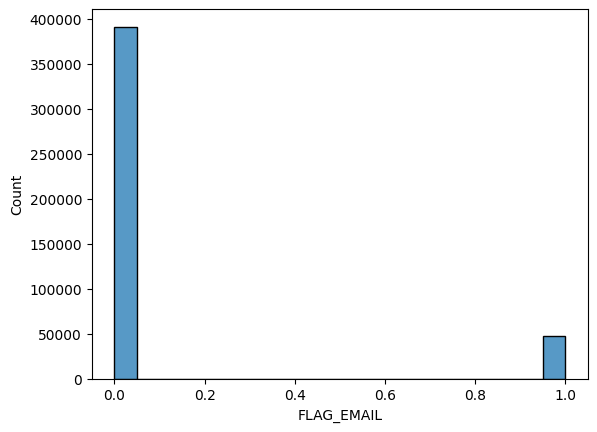

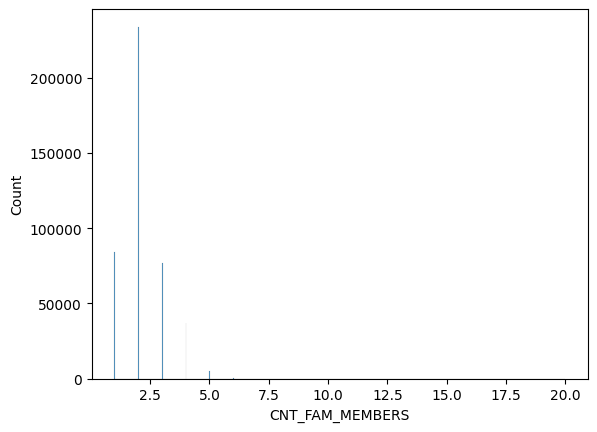

In [52]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [53]:
df.shape

(438557, 18)

### - Detecting Outliers

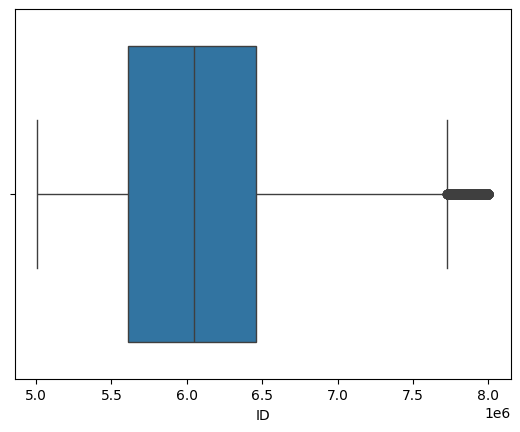

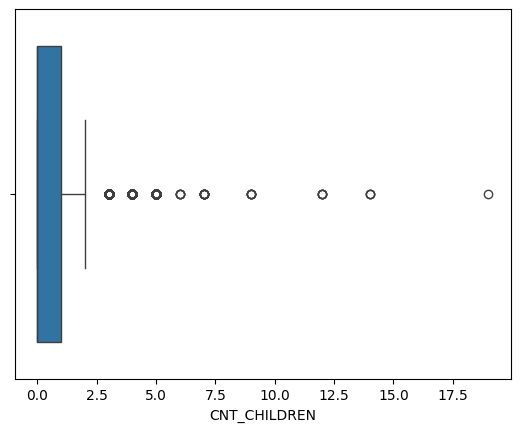

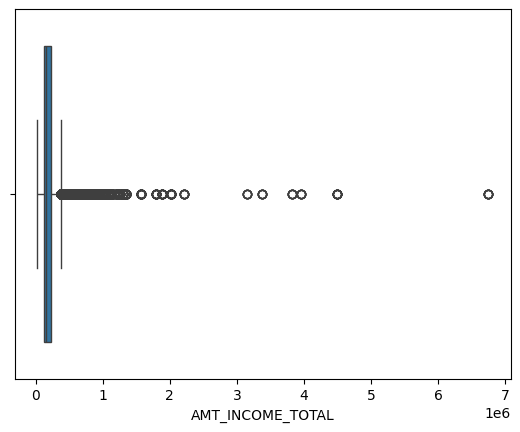

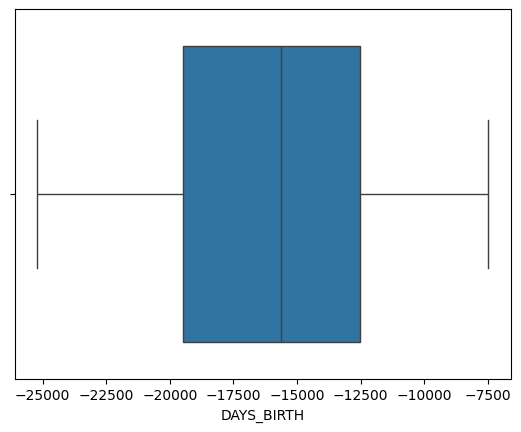

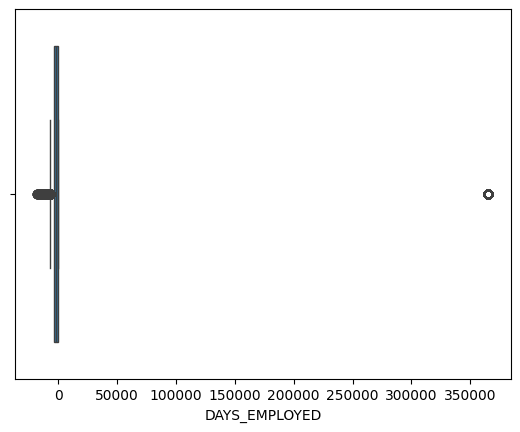

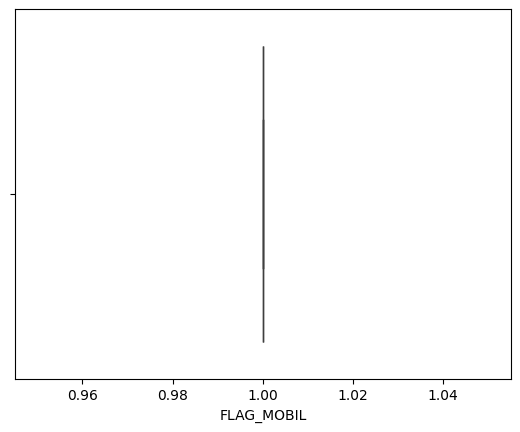

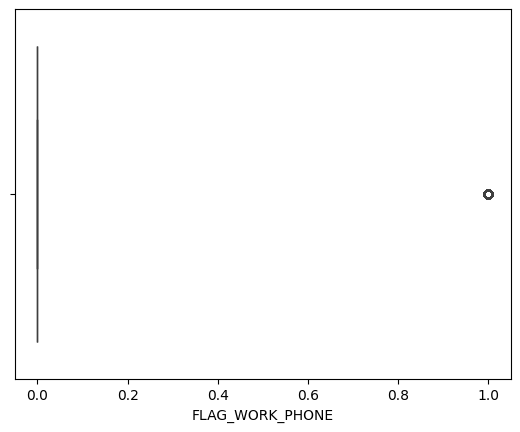

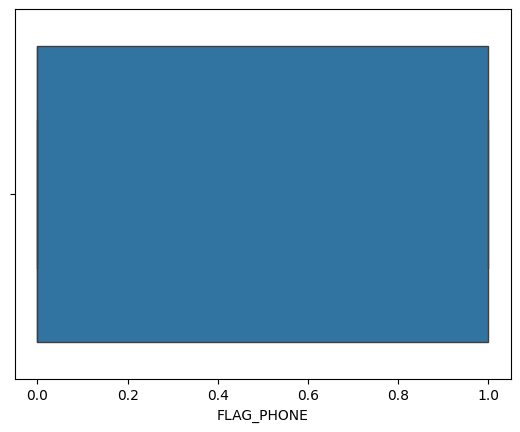

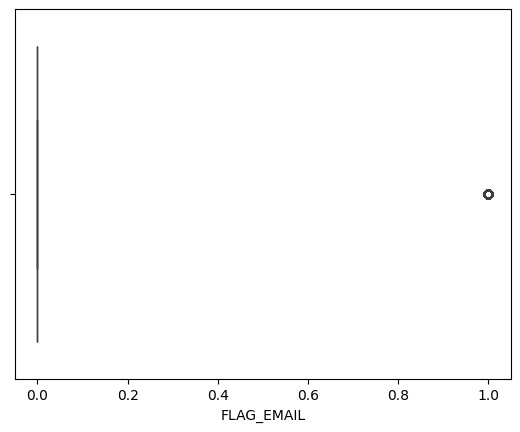

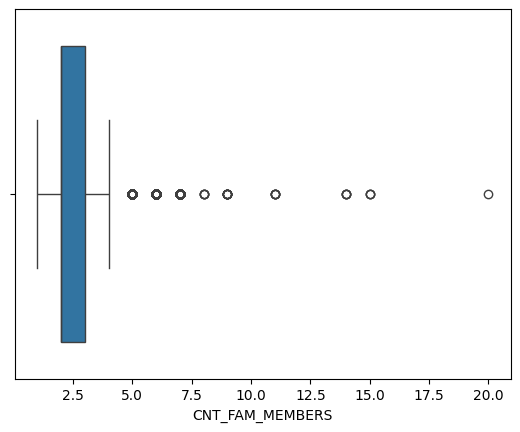

In [54]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

## Duplicates Treatment

## Removing records with IDs that are not in the second dataset (Including all the duplicated IDs)
  because all the duplicates of IDs don't exist at the second dataset with target

In [55]:
#Removing records with ID's that are not existing at the target dataset
duplicate_ids = df[df['ID'].duplicated(keep=False)]['ID'].unique()

# Get IDs from dataset2
ids_in_dataset2 = set(df_target['ID'])

# Filter duplicate IDs that are not in dataset2
duplicate_ids_to_drop = [id for id in duplicate_ids if id not in ids_in_dataset2]


df = df[~df['ID'].isin(duplicate_ids_to_drop)]


In [56]:
df.shape

(438463, 18)

In [57]:
#Number of unique records in a column
unique_counts = df.nunique()
print(unique_counts)

ID                     438463
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


# Missing values Treatment

## Filling the missig values of the OCCUPATION_TYPE column with mode

In [58]:
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-58-6e332305c9c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)


,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


# Handling DAYS_BIRTH column

As it represents number of days since birth, transforming it into years (Age) will be more effictive

In [59]:
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

#Dropping DAYS_BIRTH
df.drop(columns=['DAYS_BIRTH'], inplace=True)

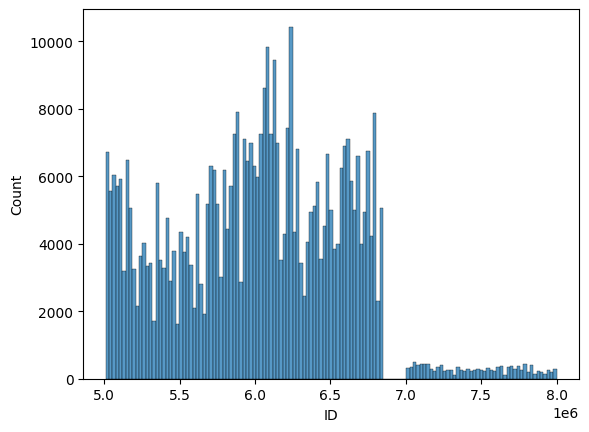

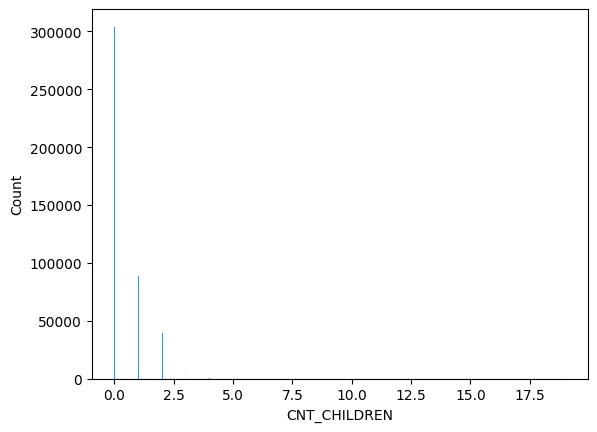

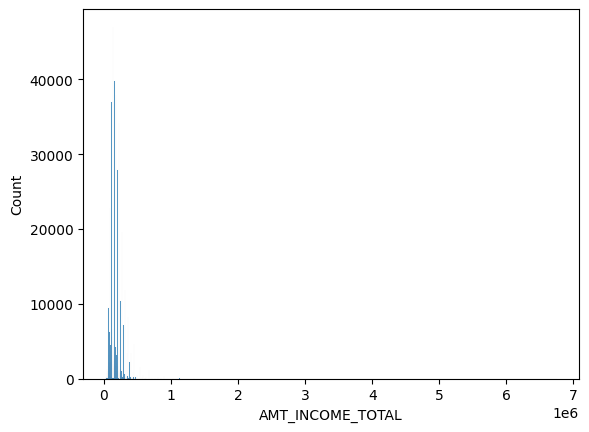

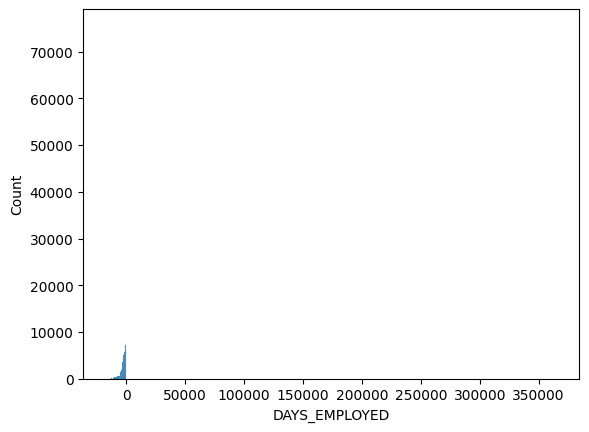

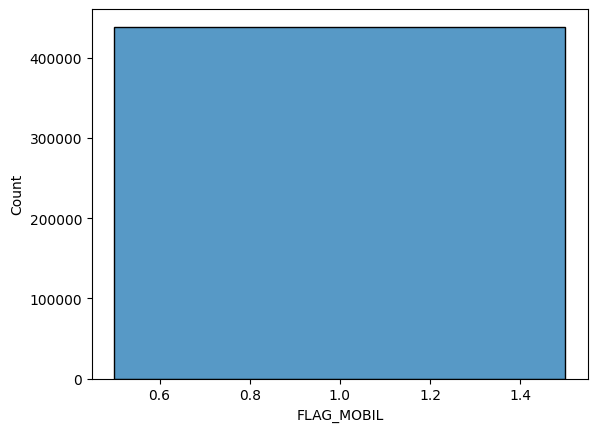

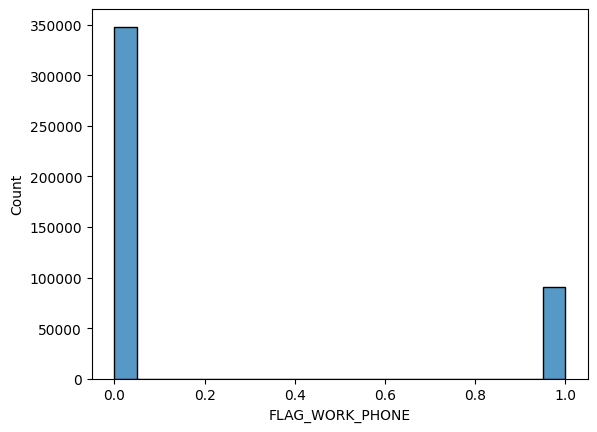

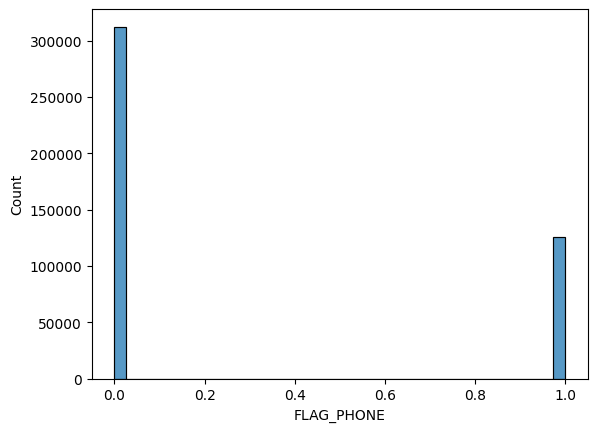

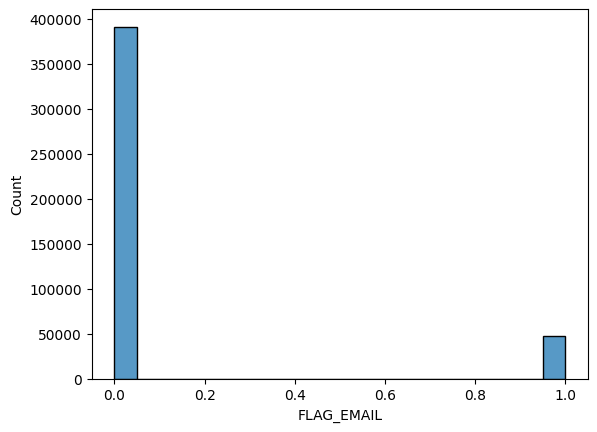

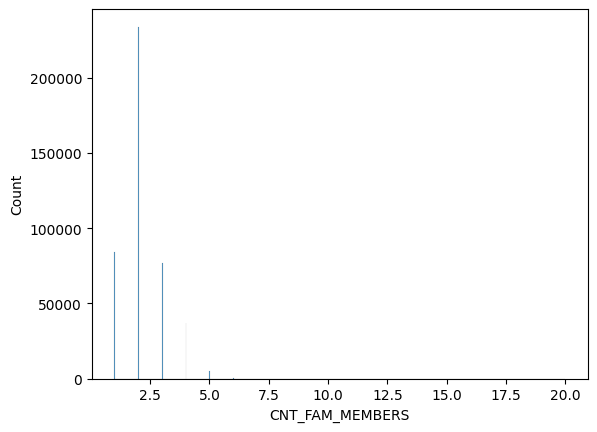

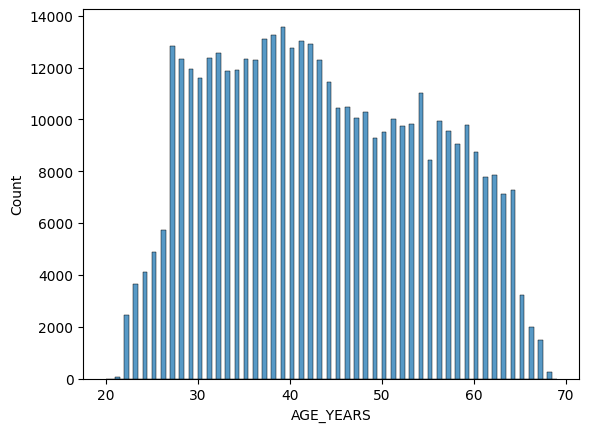

In [60]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

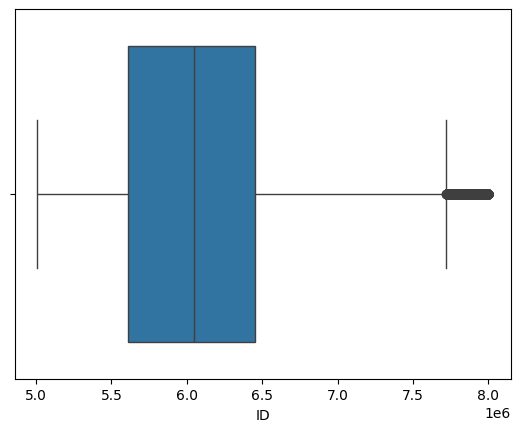

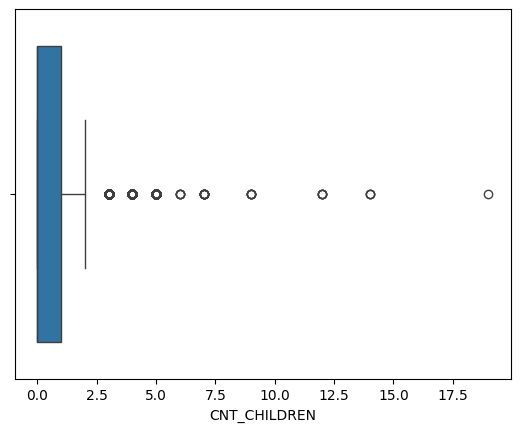

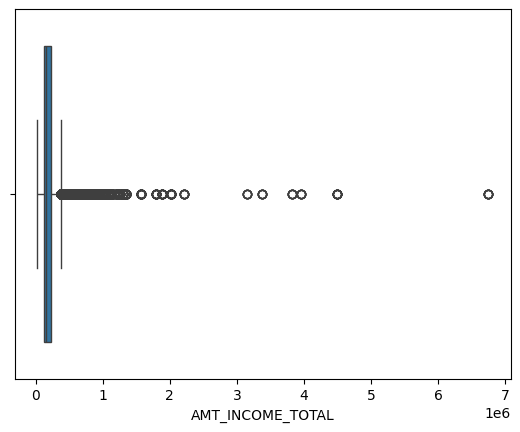

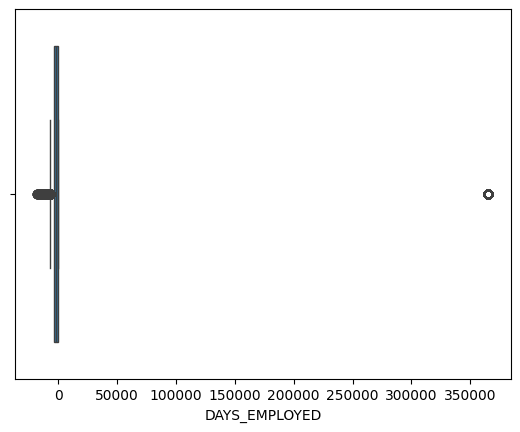

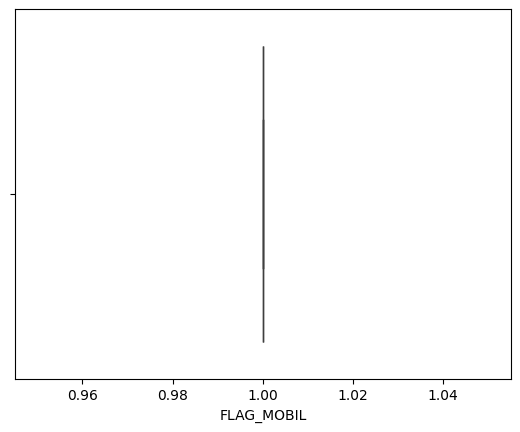

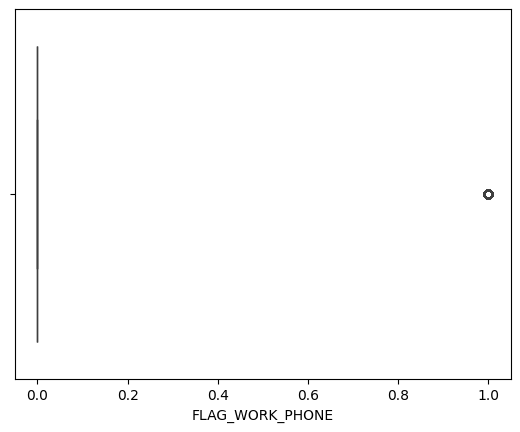

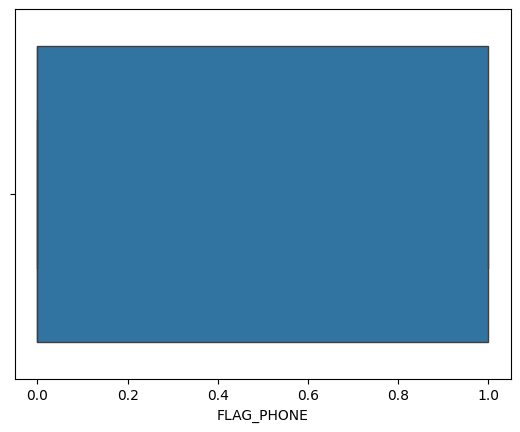

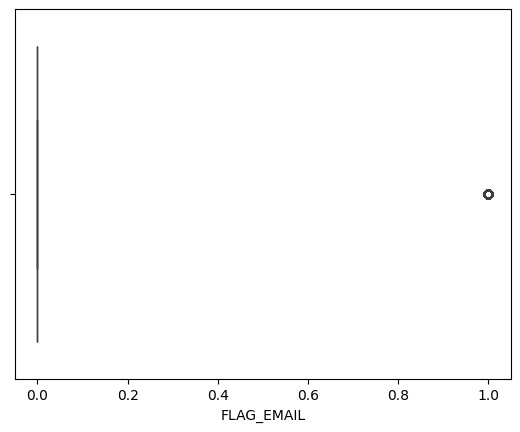

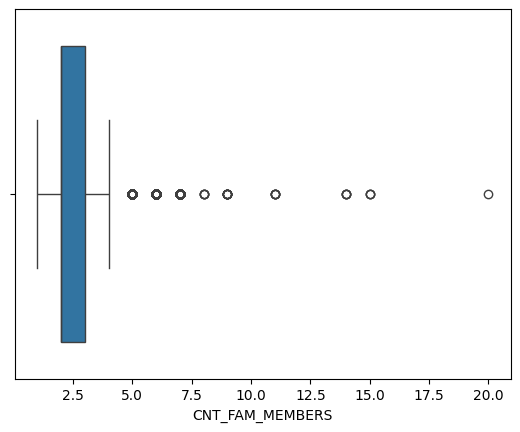

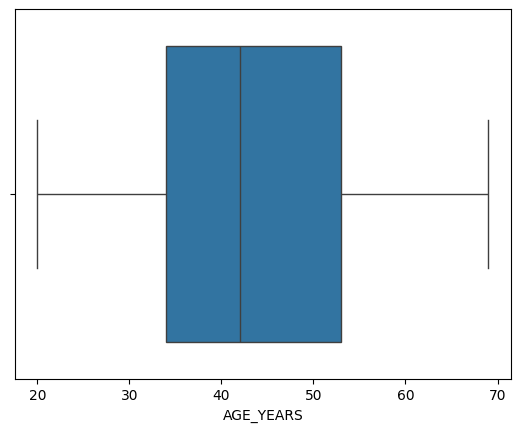

In [74]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

# Sanity Check for the Second Dataset

In [61]:
df_target.shape

(1048575, 3)

In [62]:
#Number of missing values
df_target.isnull().sum()

#Result: No missing values

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [63]:
#Number of unique records in a column
unique_counts = df_target.nunique()
print(unique_counts)

#Result: there are only 45k unique ID only

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [64]:
# Showing ID's that are duplicated
id_counts = df_target['ID'].value_counts()

# Filter for IDs that appear more than once
duplicate_ids_summary = id_counts[id_counts > 1]

print(duplicate_ids_summary)

ID
5016769    61
5002806    61
5118192    61
5145767    61
5078567    61
           ..
5010600     2
5026232     2
5091346     2
5054131     2
5026231     2
Name: count, Length: 45586, dtype: int64


## Exploratory Data Analysis (EDA) on Second Dataset

In [65]:
df_target.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [66]:
df_target.describe(include = "object")

,STATUS
count,1048575
unique,8
top,C
freq,442031


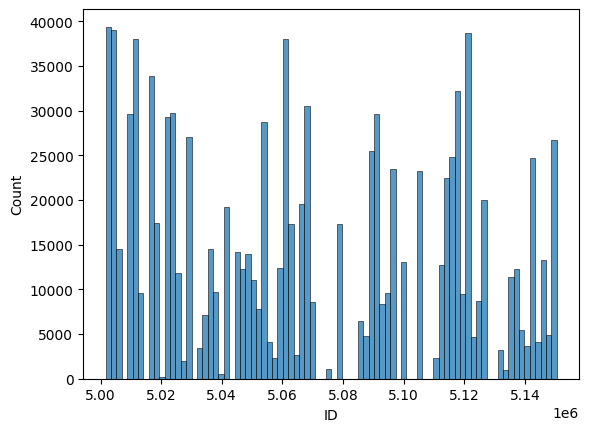

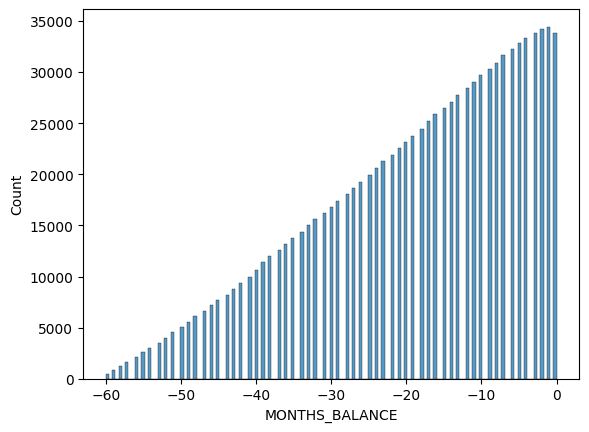

In [67]:
# histogram to understand data distribution

for i in df_target.select_dtypes(include= "number").columns:
  sns.histplot(data=df_target,x=i)
  plt.show()

In [68]:
df.shape

(438463, 18)

### - Detecting Outliers

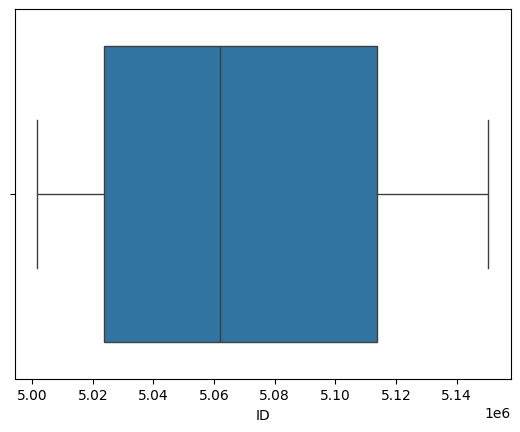

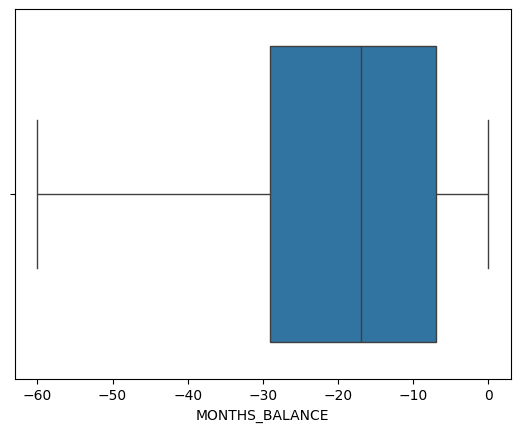

In [69]:
for i in df_target.select_dtypes(include= "number").columns:
  sns.boxplot(data=df_target,x=i)
  plt.show()

# Merging the 2 Datasets

In [70]:
df_merged = pd.merge(df, df_target, on='ID', how='inner')

In [71]:
df_merged.shape

(777715, 20)

In [72]:
#Number of unique records in a column
unique_counts = df_merged.nunique()
print(unique_counts)

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
AGE_YEARS                 49
MONTHS_BALANCE            61
STATUS                     8
dtype: int64


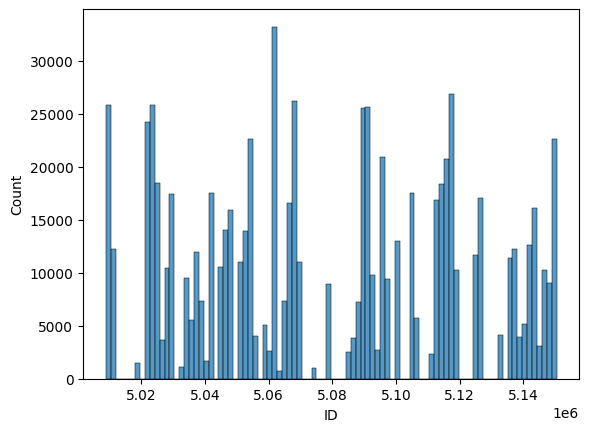

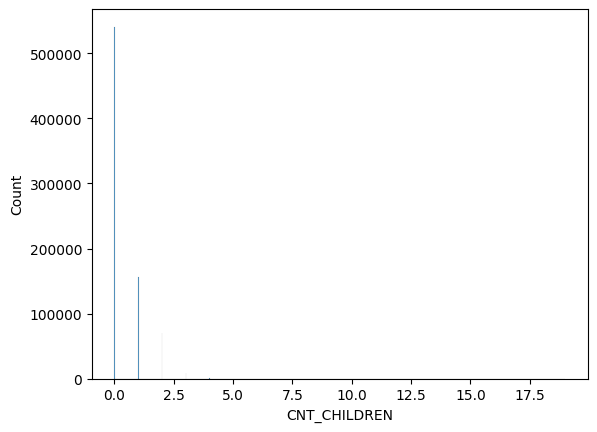

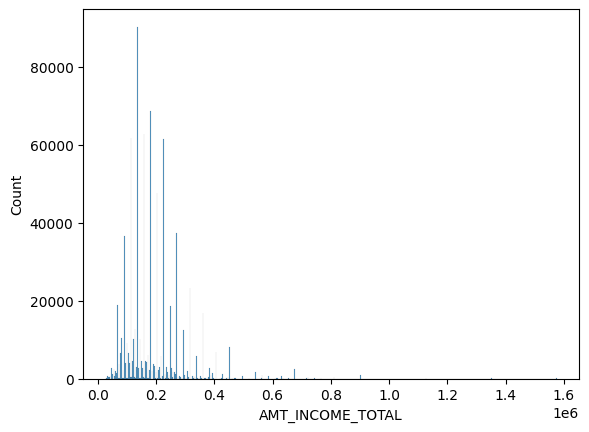

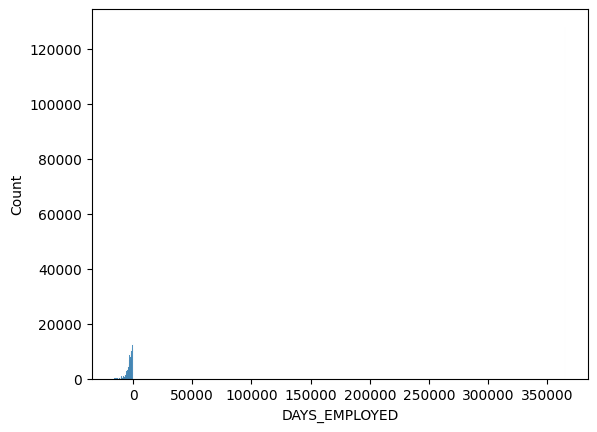

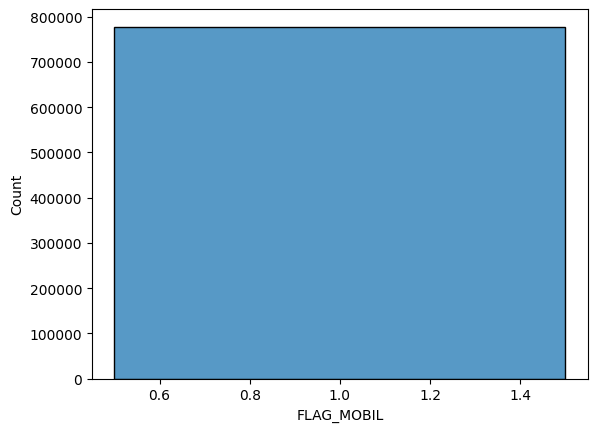

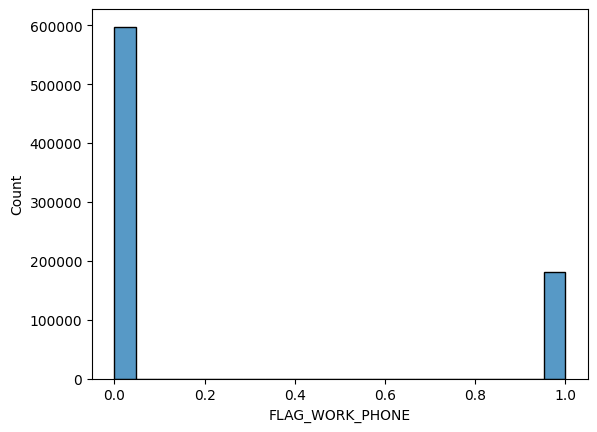

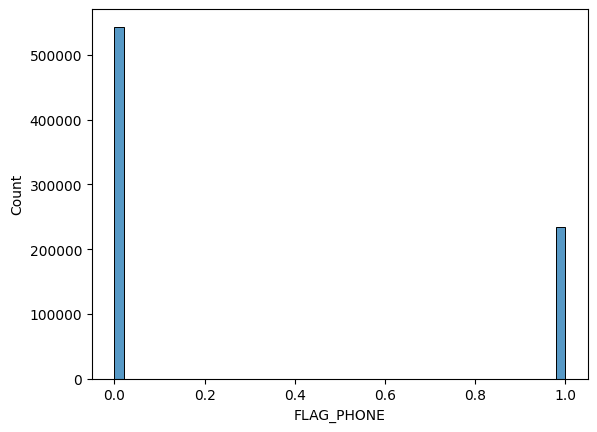

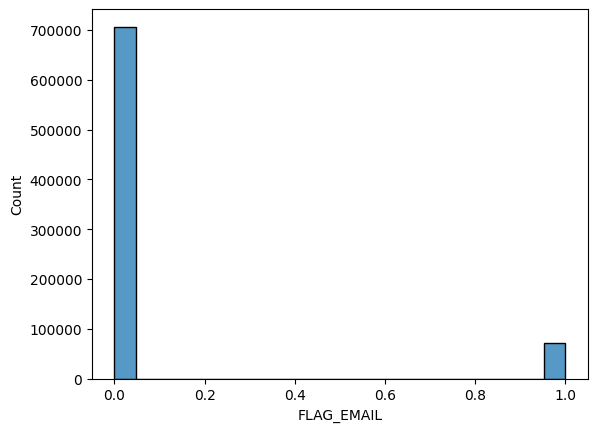

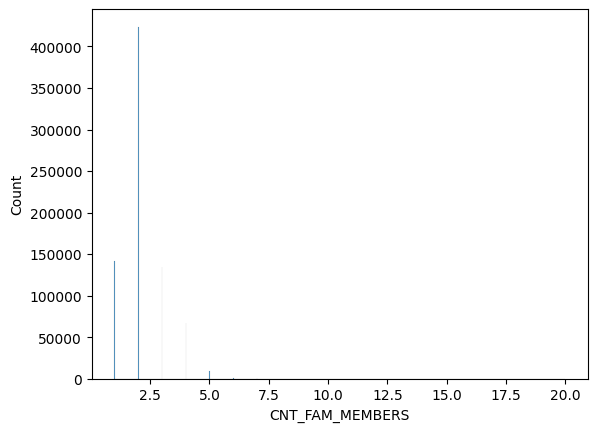

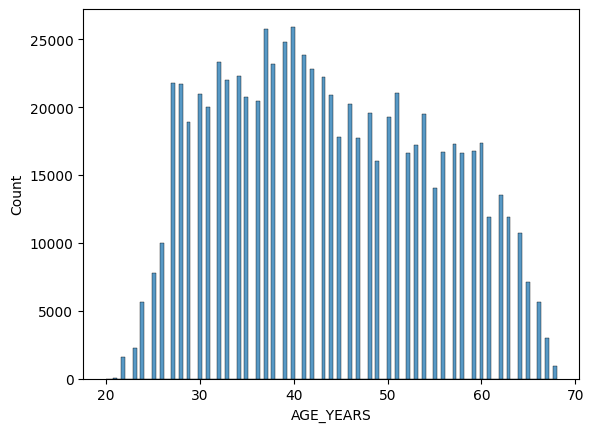

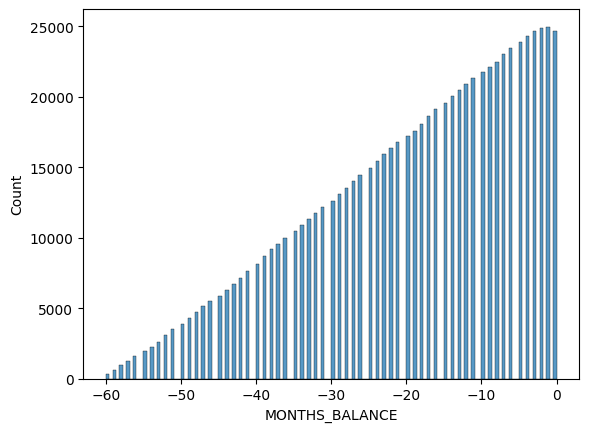

In [75]:
# histogram to understand data distribution

for i in df_merged.select_dtypes(include= "number").columns:
  sns.histplot(data=df_merged,x=i)
  plt.show()

In [73]:
#df_merged.to_csv('/content/drive/My Drive/merged_dataset.csv', index=False)